In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1.加载数据：

In [2]:
# parse_dates参数用于尝试将数据解析为datetime，index_col参数用作结果中行索引的列号或列名
stock = pd.read_csv("./data/stock.csv",parse_dates=True, index_col=0)

In [3]:
stock

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [4]:
# 按照工作日频率进行重新采样——因为原始数据有些工作日数据缺失，因此重采样后数据行数会增多
stock_re = stock.resample("B").ffill()
stock_re

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


# 2.rolling：

### 获取苹果公司股票价格的200天的移动窗口平均值

In [5]:
stock_re["AAPL"].rolling(200).mean()

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    355.45410
2011-10-11    355.79910
2011-10-12    356.14005
2011-10-13    356.51355
2011-10-14    356.94295
Freq: B, Name: AAPL, Length: 2292, dtype: float64

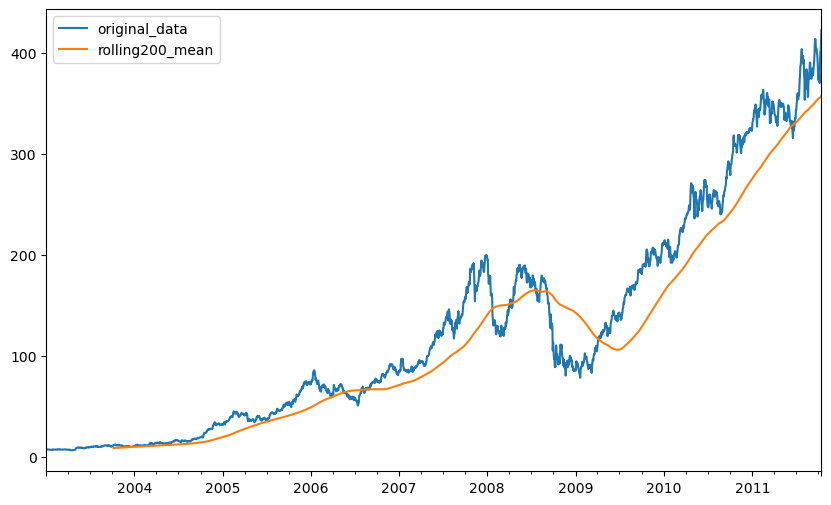

In [6]:
stock_re["AAPL"].plot(figsize=(10,6) , label="original_data") # 原始数据

stock_re["AAPL"].rolling(200).mean().plot(label="rolling200_mean") # 移动窗口平均值数据

plt.legend() # 创建图例

### 在 DataFrame 上调用移动窗口函数会将转换应用于每一列：

In [7]:
stock_re.rolling(200).mean()

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN,NaN
2003-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...
2011-10-10,355.45410,25.79720,79.14645,1278.28990
2011-10-11,355.79910,25.79435,79.15980,1277.91660
2011-10-12,356.14005,25.79175,79.17860,1277.57005
2011-10-13,356.51355,25.78620,79.19105,1277.21910


<AxesSubplot:>

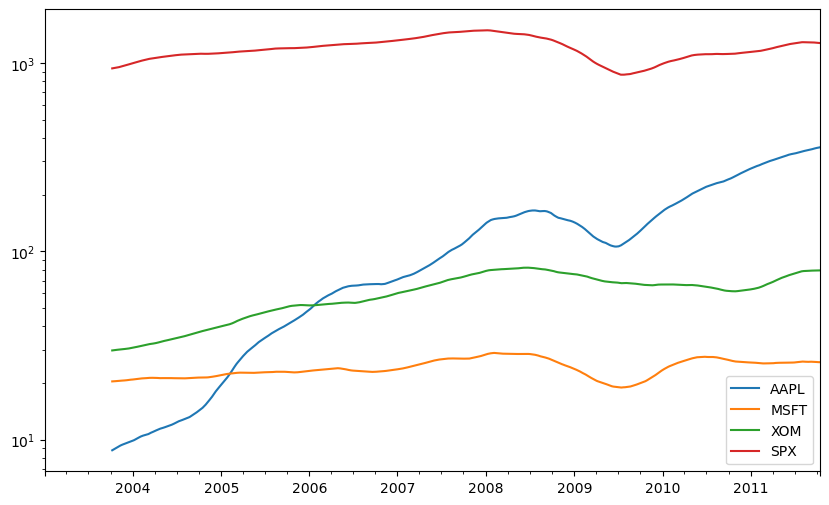

In [8]:
# 画图中如果X轴或者Y轴的数据差异过大，可能会导致图像展示不友好，数值小的部分基本上无法展示，可以传入logy=True进行Y轴的缩放(绘制y轴的对数图形)
stock_re.rolling(200).mean().plot(logy=True , figsize=(10,6))

### rolling 函数也接收一个表示固定大小的时间偏置字符串。例如，我们可以像这样计算200天的滚动平均值：

In [9]:
stock_re.rolling("200D").mean()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.400000,21.110000,29.220000,909.030000
2003-01-03,7.425000,21.125000,29.230000,908.810000
2003-01-06,7.433333,21.256667,29.473333,915.543333
2003-01-07,7.432500,21.425000,29.342500,917.390000
2003-01-08,7.402000,21.402000,29.240000,915.898000
...,...,...,...,...
2011-10-10,359.430070,25.430352,78.658732,1268.551549
2011-10-11,359.773380,25.442394,78.614155,1267.718732
2011-10-12,360.070000,25.453007,78.603986,1267.295874
2011-10-13,360.405833,25.465000,78.588472,1266.853958


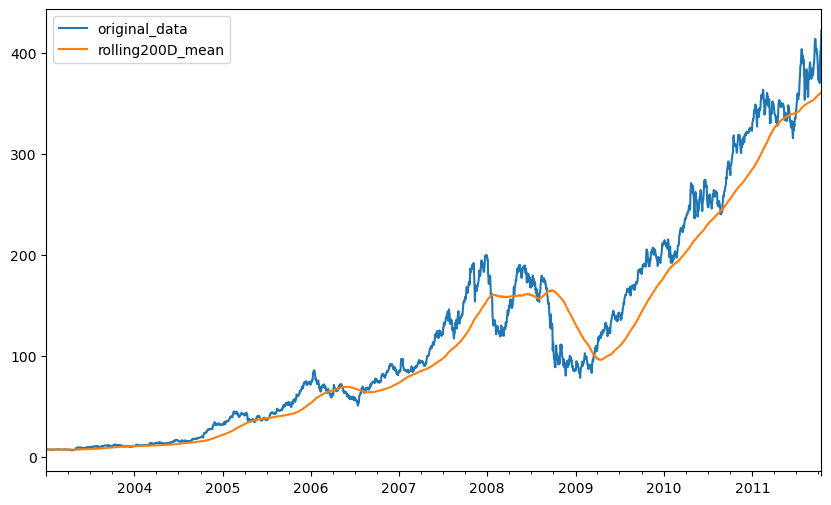

In [10]:
stock_re["AAPL"].plot(figsize=(10,6), label="original_data") # 原始数据

stock_re["AAPL"].rolling("200D").mean().plot(label="rolling200D_mean") # 移动窗口平均值数据

plt.legend() # 创建图例

# 2.expanding:

### expanding从时间序列的起始位置开始时间窗口，并增加窗口的大小，直到它涵盖整个序列。

In [11]:
rolling_mean = stock_re["AAPL"].rolling(200).mean()

In [12]:
rolling_mean

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    355.45410
2011-10-11    355.79910
2011-10-12    356.14005
2011-10-13    356.51355
2011-10-14    356.94295
Freq: B, Name: AAPL, Length: 2292, dtype: float64

In [13]:
expanding_mean = stock_re["AAPL"].expanding(200).mean()

In [14]:
expanding_mean

2003-01-02           NaN
2003-01-03           NaN
2003-01-06           NaN
2003-01-07           NaN
2003-01-08           NaN
                 ...    
2011-10-10    124.845337
2011-10-11    124.965671
2011-10-12    125.086729
2011-10-13    125.210406
2011-10-14    125.339895
Freq: B, Name: AAPL, Length: 2292, dtype: float64

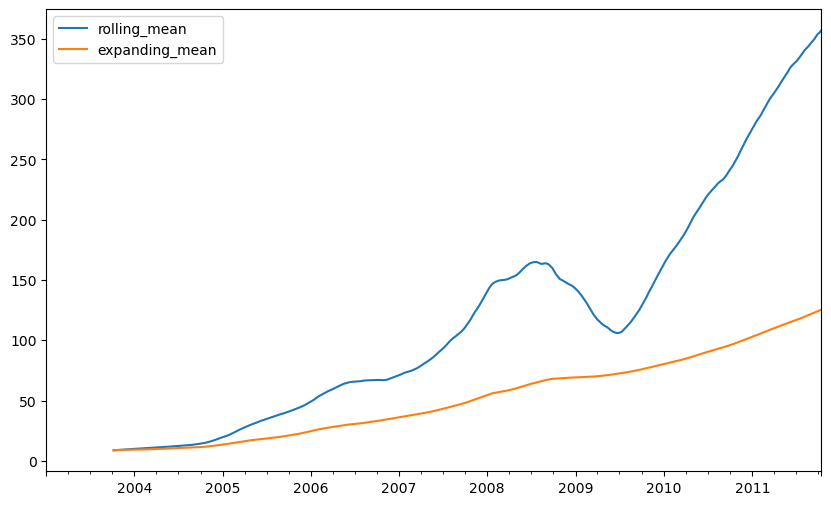

In [15]:
rolling_mean.plot(figsize=(10,6) , label="rolling_mean")

expanding_mean.plot(label="expanding_mean")

plt.legend() # 创建图例